<a href="https://colab.research.google.com/github/Prasad-Khedkar/Global-Terrorism-EDA/blob/main/Global_Terrorism(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Essential Libraries

In [1]:
import numpy as np                        ## Linear Algebra
import pandas as pd                       ## Framing data
import matplotlib.pyplot as plt           ## Visualization
import seaborn as sns                     ## Visualization
import warnings
warnings.filterwarnings('ignore')         ## To ignore warning messages
sns.set(style="darkgrid")                 ## setting dark themed grid for seaborn

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Projects/EDA-Global Terrorism/Data/'

### Data-Wrangling

In [4]:
df = pd.read_csv(path + 'Global Terrorism Data.csv',encoding='latin-1')             ## Loading the Data-set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
print(list(df.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [8]:

## Renaming the Columns and Selecting Relevant Columns for our data-set

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','city':'City','region_txt':'Region','provstate':'Province','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','target1':'Target_Name','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_Name','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)
df = df[['Year','Month','Day','City','Province','Country','Region','Attack_Type','Target_Type','Killed','Wounded','Group_Name','Weapon_Type']]

In [9]:
df.head()

,Year,Month,Day,City,Province,Country,Region,Attack_Type,Target_Type,Killed,Wounded,Group_Name,Weapon_Type
0,1970,7,2,Santo Domingo,NaN,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,MANO-D,Unknown
1,1970,0,0,Mexico city,Federal,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,23rd of September Communist League,Unknown
2,1970,1,0,Unknown,Tarlac,Philippines,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,Unknown,Unknown
3,1970,1,0,Athens,Attica,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Unknown,Explosives
4,1970,1,0,Fukouka,Fukouka,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Unknown,Incendiary


In [10]:
df.shape

(181691, 13)

In [11]:
df.describe()                                      ## Describing Numerical Attributes

,Year,Month,Day,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [12]:
df.isnull().sum()                  ## Null Values Counts

Year               0
Month              0
Day                0
City             434
Province         421
Country            0
Region             0
Attack_Type        0
Target_Type        0
Killed         10313
Wounded        16311
Group_Name         0
Weapon_Type        0
dtype: int64

In [13]:
df['City'].fillna('Unknown',inplace=True)          ## Filling NaN categorical values with 'Unknown'
df['Province'].fillna('Unknown',inplace=True)

In [14]:
km=df['Killed'].mean()
df['Killed'].fillna(km,inplace=True)             ## Filling null numerical values with mean value of the column

In [15]:
wm=df['Wounded'].mean()
df['Wounded'].fillna(wm,inplace=True)

In [16]:
df.isnull().sum()

Year           0
Month          0
Day            0
City           0
Province       0
Country        0
Region         0
Attack_Type    0
Target_Type    0
Killed         0
Wounded        0
Group_Name     0
Weapon_Type    0
dtype: int64

### Year-Wise Analysis

In [17]:
df['Year'].value_counts()[:10]

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

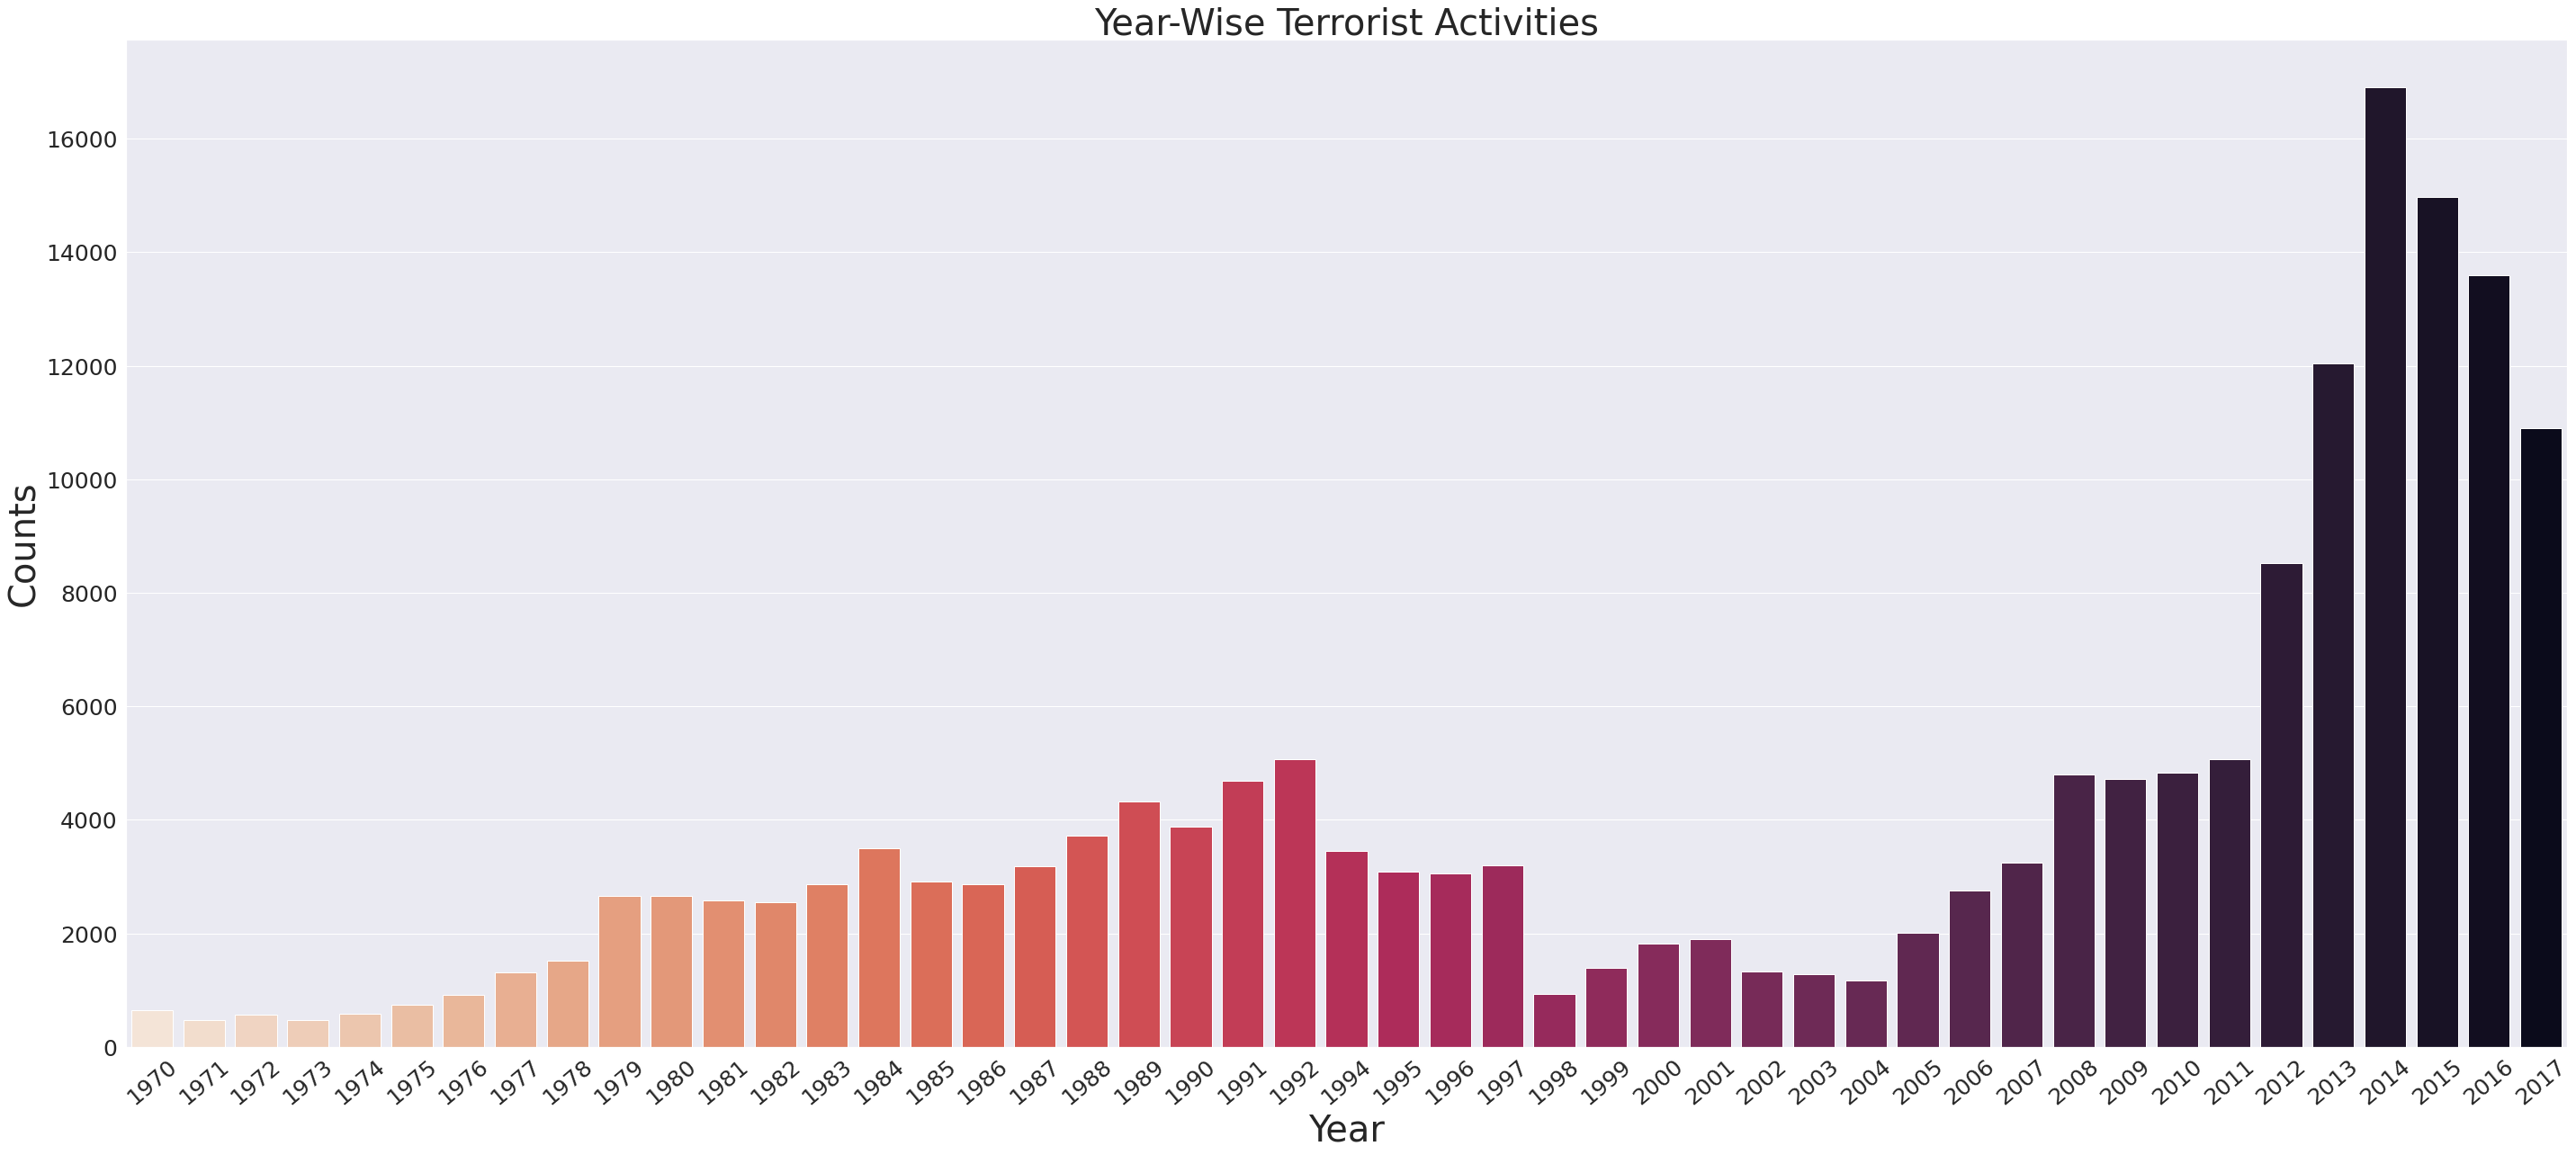

In [18]:
plt.figure(figsize=(40,18))
sns.countplot(x=df["Year"],palette='rocket_r')
plt.xticks(size=25,rotation =40)
plt.yticks(size=25)
plt.xlabel('Year',fontsize=40)
plt.ylabel('Counts',fontsize=40)
plt.title('Year-Wise Terrorist Activities',fontsize=40)
plt.tight_layout()
plt.show()

### Attack-Type Analysis

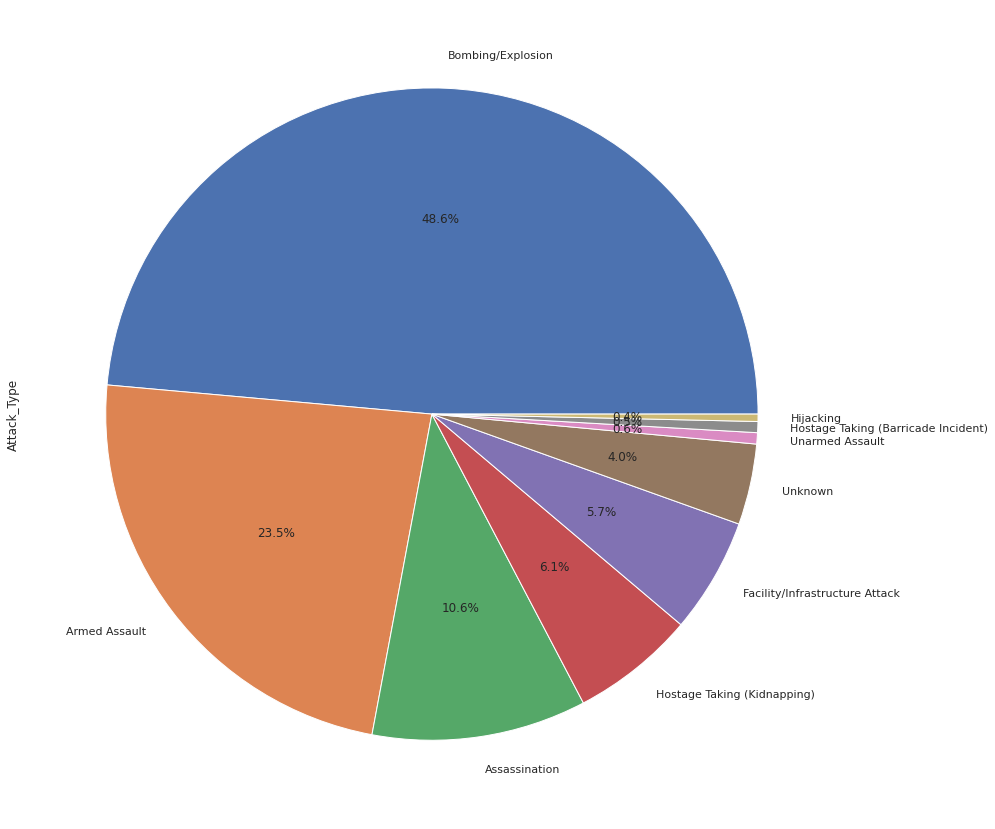

In [19]:
df['Attack_Type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.show()

## Target-Type Analysis

In [20]:
df['Target_Type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_Type, dtype: int64

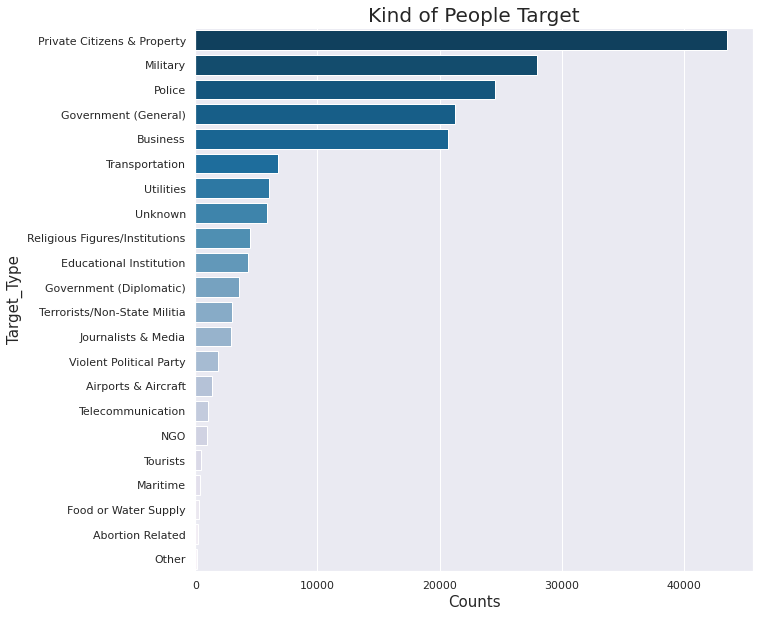

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Target_Type'].value_counts(),y=df['Target_Type'].value_counts().index,palette='PuBu_r')
plt.xlabel('Counts',fontsize=15)
plt.ylabel('Target_Type',fontsize=15)
plt.title('Kind of People Target',fontsize=20)
plt.show()

## Weapon-Type Analysis

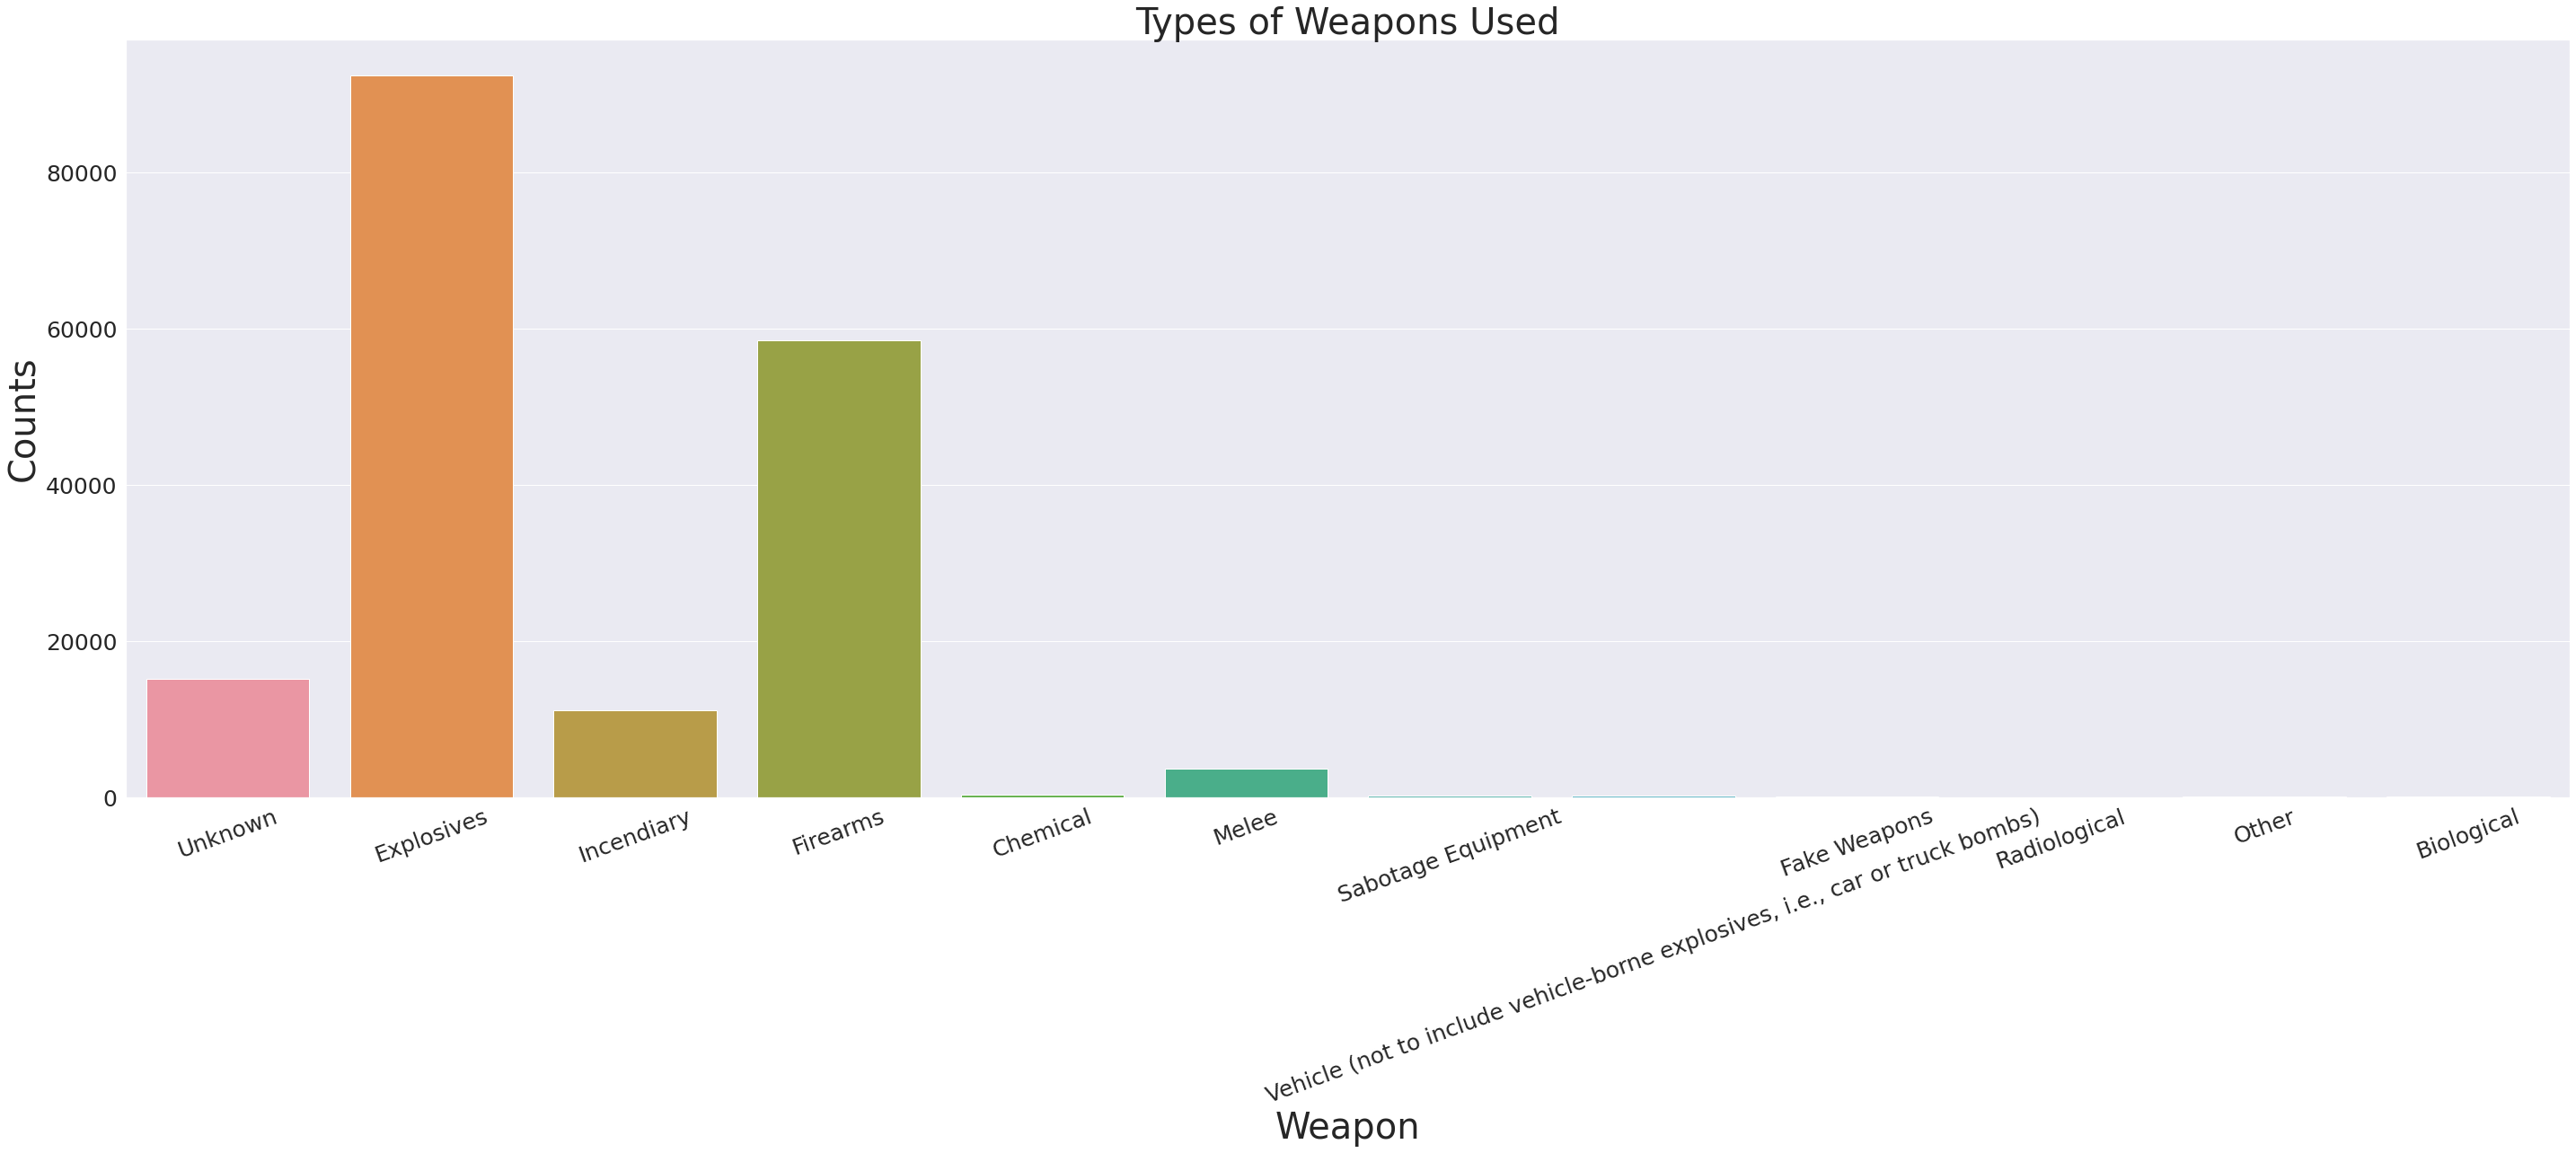

In [22]:
plt.figure(figsize=(40,18))
sns.countplot(x=df["Weapon_Type"])
plt.xticks(size=25,rotation = 20)
plt.yticks(size=25)
plt.xlabel("Weapon",fontsize=40)
plt.ylabel('Counts',fontsize=40)
plt.title('Types of Weapons Used',fontsize=40)
plt.tight_layout()
plt.show()

## Regions Affected

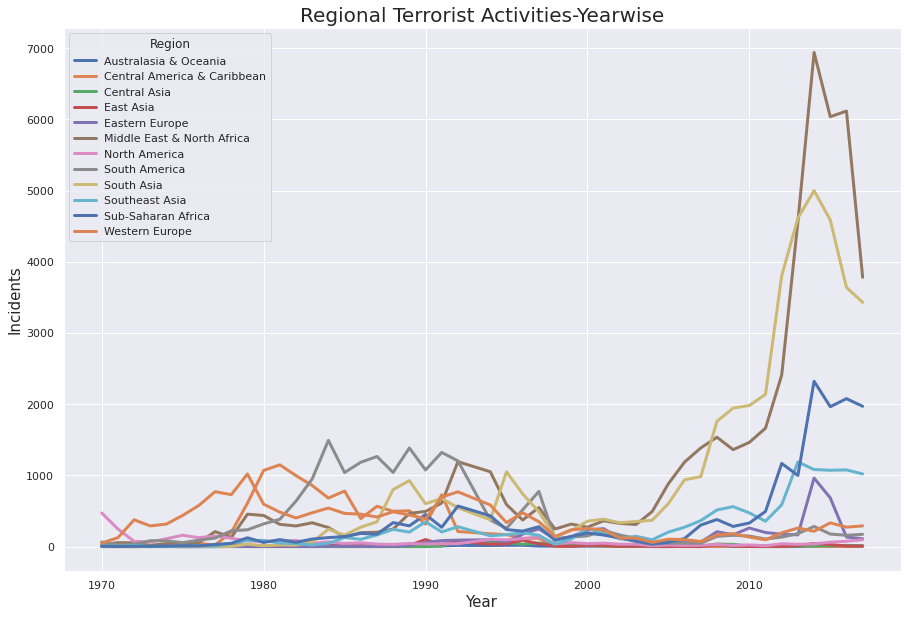

In [23]:
pd.crosstab(df.Year,df.Region).plot(kind='line',figsize=(15,10),linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Incidents',fontsize=15)
plt.title('Regional Terrorist Activities-Yearwise',fontsize=20)
plt.show()

## Group-Wise Analysis

### Top 20 Terrorist Organisations

In [24]:
df1=df['Group_Name'].value_counts()[1:21]
df1

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

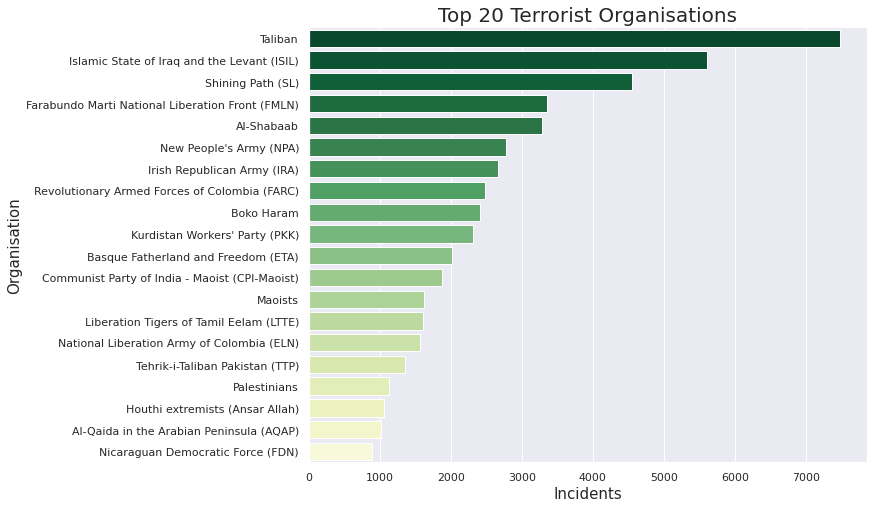

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df['Group_Name'].value_counts()[1:21].values, y=df['Group_Name'].value_counts()[1:21].index,palette=('YlGn_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('Organisation',fontsize=15)
plt.title('Top 20 Terrorist Organisations',fontsize=20)
plt.show()

## Top 20 Countries Affected

In [26]:
df2 = df['Country'].value_counts()[:20]
df2

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

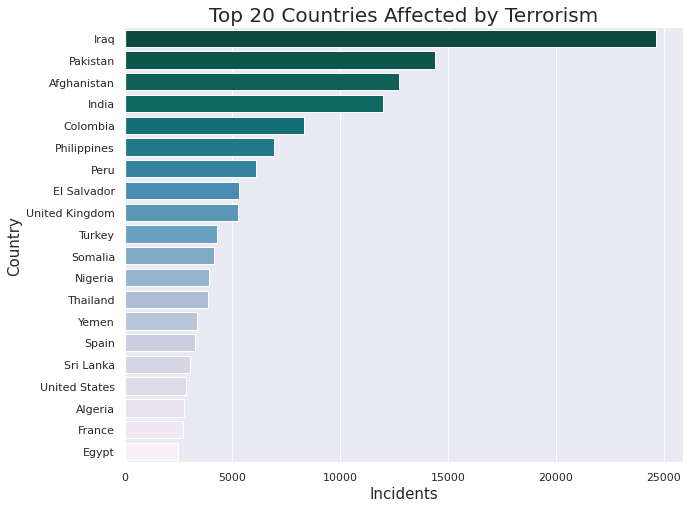

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df['Country'].value_counts()[:20].values, y=df['Country'].value_counts()[:20].index,palette=('PuBuGn_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.title('Top 20 Countries Affected by Terrorism',fontsize=20)
plt.show()

## Top 20 Affected Cities

In [28]:
df3=df['City'].value_counts()[1:21]
df3

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Name: City, dtype: int64

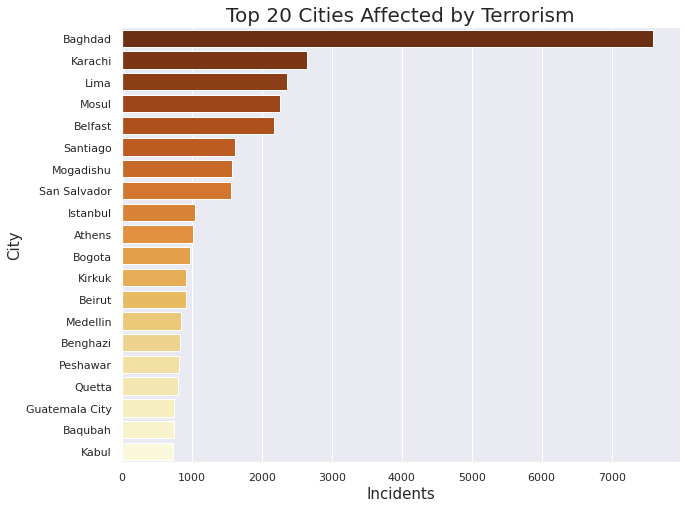

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df['City'].value_counts()[1:21].values, y=df['City'].value_counts()[1:21].index,palette=('YlOrBr_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('City',fontsize=15)
plt.title('Top 20 Cities Affected by Terrorism',fontsize=20)
plt.show()

## Top 20 Affected Provinces

In [30]:
df4=df['Province'].value_counts()[:22]
df4.drop(['Unknown','Baghdad'], inplace=True)
df4

Northern Ireland                       4498
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Basque Country                         1446
Borno                                  1423
Name: Province, dtype: int64

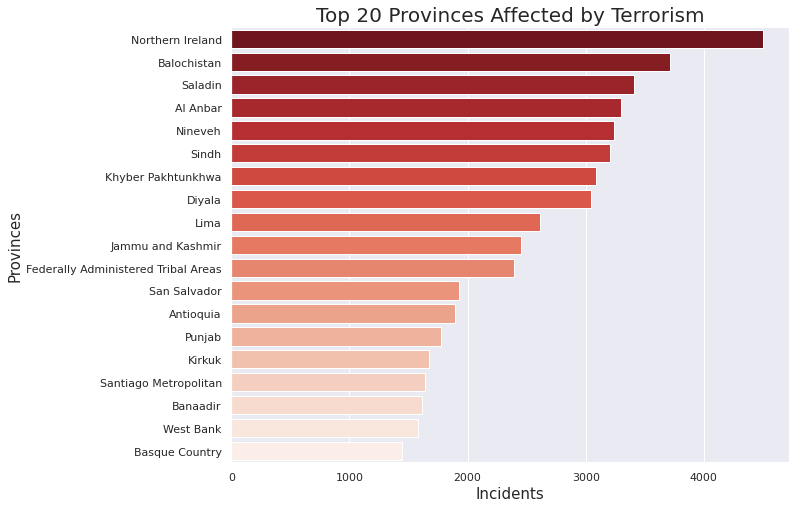

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df['Province'].value_counts()[2:21].values, y=df['Province'].value_counts()[2:21].index,palette=('Reds_r'))
plt.xlabel('Incidents',fontsize=15)
plt.ylabel('Provinces',fontsize=15)
plt.title('Top 20 Provinces Affected by Terrorism',fontsize=20)
plt.show()

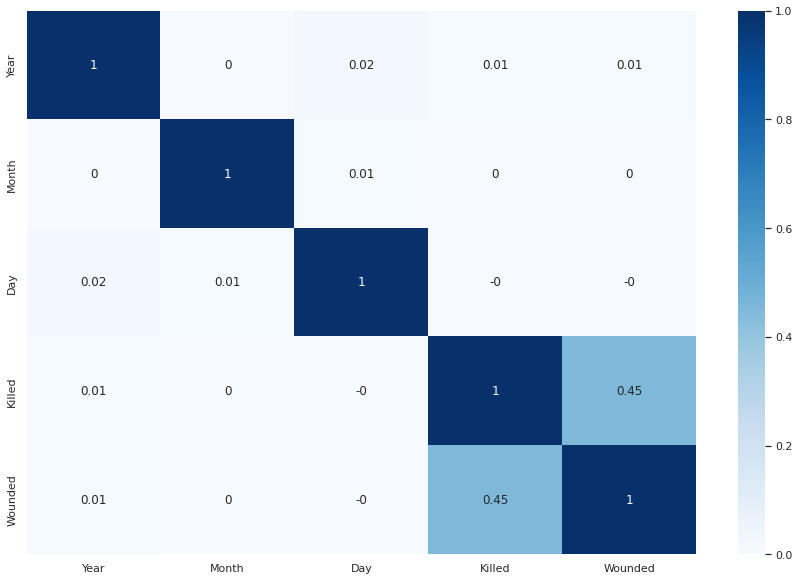

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(df.corr(),2),annot=True,cmap='Blues')
plt.show()

##    Insights drawn from above EDA

* Most terrorist activities happened during 2013-17, especially in the year 2014 (Total no. of attacks 16903)       
* Iraq is the most affected Country (Total no. of attacks 24636)     
* Baghdad is the most affected city (Total no. of attacks 7589)     
* Northern Ireland is the most affected Province.      
* Middle-East is the most affected Region.        
* Private-Citizens(43511 targeted) and Millitary(27984 targeted) are the kind of people mostly targeted during attacks.
* From the heatmap it is seen that no. of people wounded is co-related to no. of people killed- This is logical because from total no. of people few get killed and few get injured/wounded during attack.                  
* Explosives and Firearms are mostly used during attacks.
* Bombing is the most frequently used method of an attack.
* Taliban and ISIL are the top Terrorist Organisations                 
  (Responsible for total 7478 and 5613 no. of attacks respectively.)





